(lecture04:homework)=
# Homework 4

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.

+ The total homework points are 100. Please note that the problems are not weighed equally.

```{note}
+ Please match all the pages corresponding to each of the questions when you submit on gradescope.
```

## Student details

+ **First Name:** Timothy
+ **Last Name:** Lee
+ **Email:** lee5695@purdue.edu

Let me set you up with some nice code for plotting and downloading files.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')

/tmp/ipython-input-367591302.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina', 'svg')


## Problem 1 - Visual analysis of a variable-speed compressor experiment

In this problem you are going to need [this](https://raw.githubusercontent.com/PurdueMechanicalEngineering/me-297-intro-to-data-science/master/data/compressor_data.xlsx) dataset. The dataset was kindly provided to us by [Professor Davide Ziviani](https://scholar.google.com/citations?user=gPdAtg0AAAAJ&hl=en).
As before, you can either put it on your Google drive or just download it with the code segment below:

In [3]:
!curl -O 'https://raw.githubusercontent.com/PurdueMechanicalEngineering/me-239-intro-to-data-science/master/data/compressor_data.xlsx'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14771  100 14771    0     0  64020      0 --:--:-- --:--:-- --:--:-- 64221


The data are part of a an experimental study of a variable speed reciprocating compressor.
The experimentalists varied two temperatures $T_e$ and $T_c$ (both in degrees C) and they measured various other quantities.
Your goal is to understand the experimental design and develop some intuition of the map between $T_e$ and $T_c$ and measured Capacity and Power (both in W).
Answer the following questions.

+ Do the scatter plot of $T_e$ and $T_c$. This will reveal the experimental design picked by the experimentalists. Make sure you label the axes correctly. Hint: These are columns `T_e` and `T_c` of the data frame `data`.

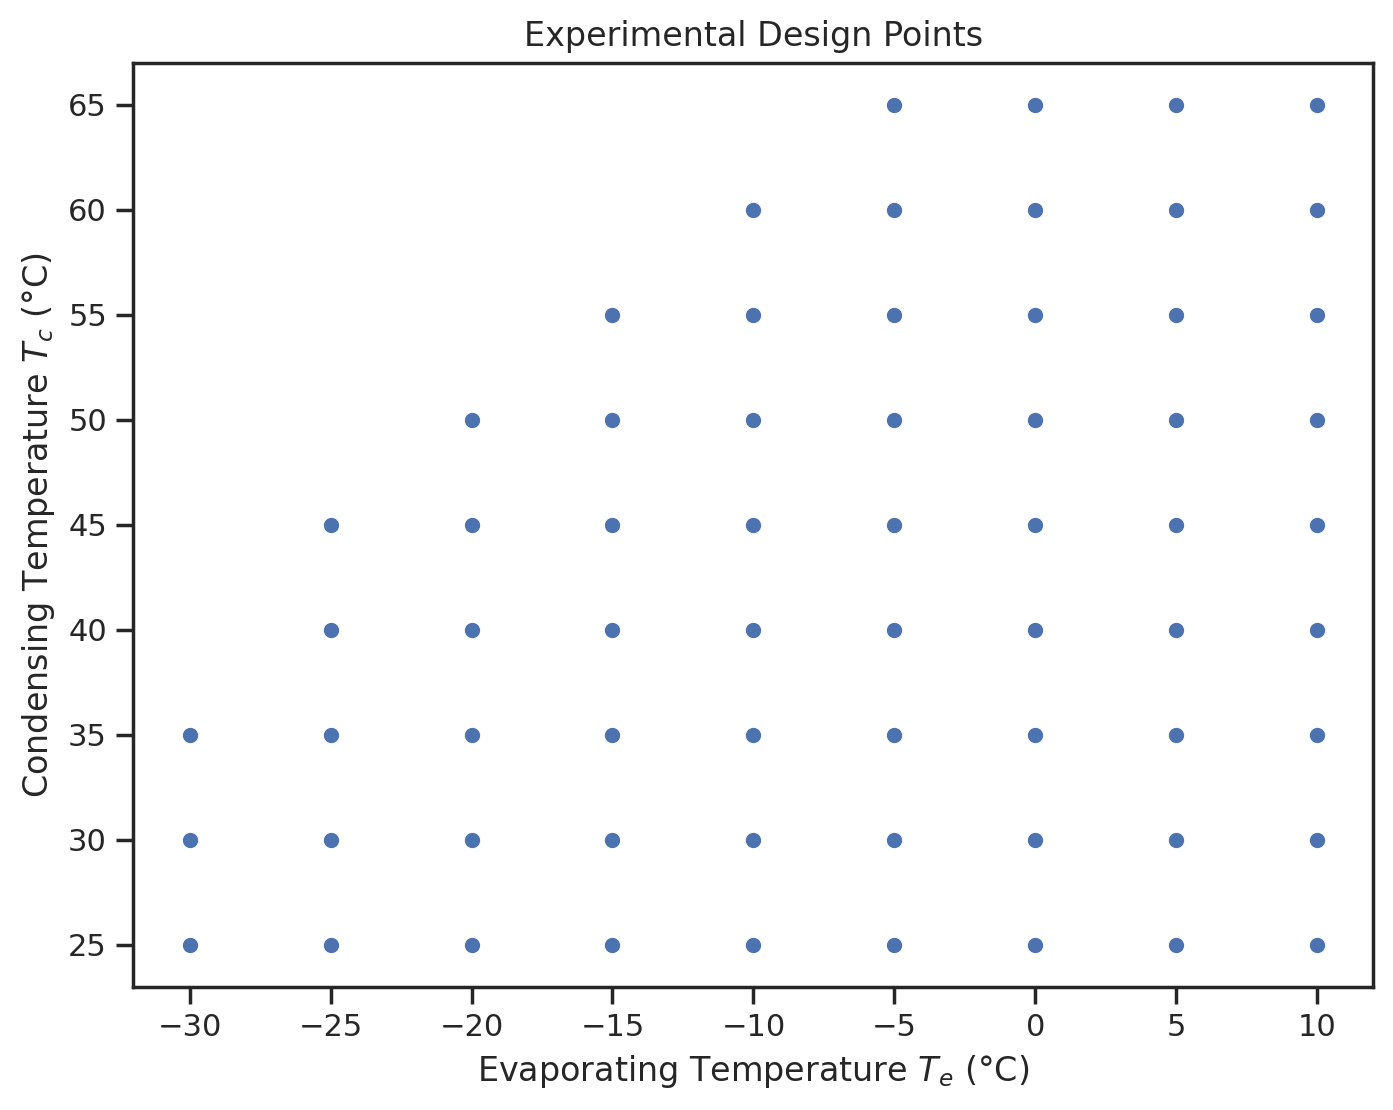

In [4]:
import pandas as pd
data = pd.read_excel('compressor_data.xlsx')

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='T_e', y='T_c')
plt.xlabel('Evaporating Temperature $T_e$ (°C)')
plt.ylabel('Condensing Temperature $T_c$ (°C)')
plt.title('Experimental Design Points')
plt.show()

+ Is there a gap in the experimental design? If yes, why do you think they have a gap?

Yes, there is a gap in the top left corner of the plot, which is the low evaporating temperature and high condensing temperature region. This is a region that has an extremely high compression ratio, which is problematic for both safety and for the compressor to run properly.

+ Do the scatter plot between `T_e` and `Capacity`.

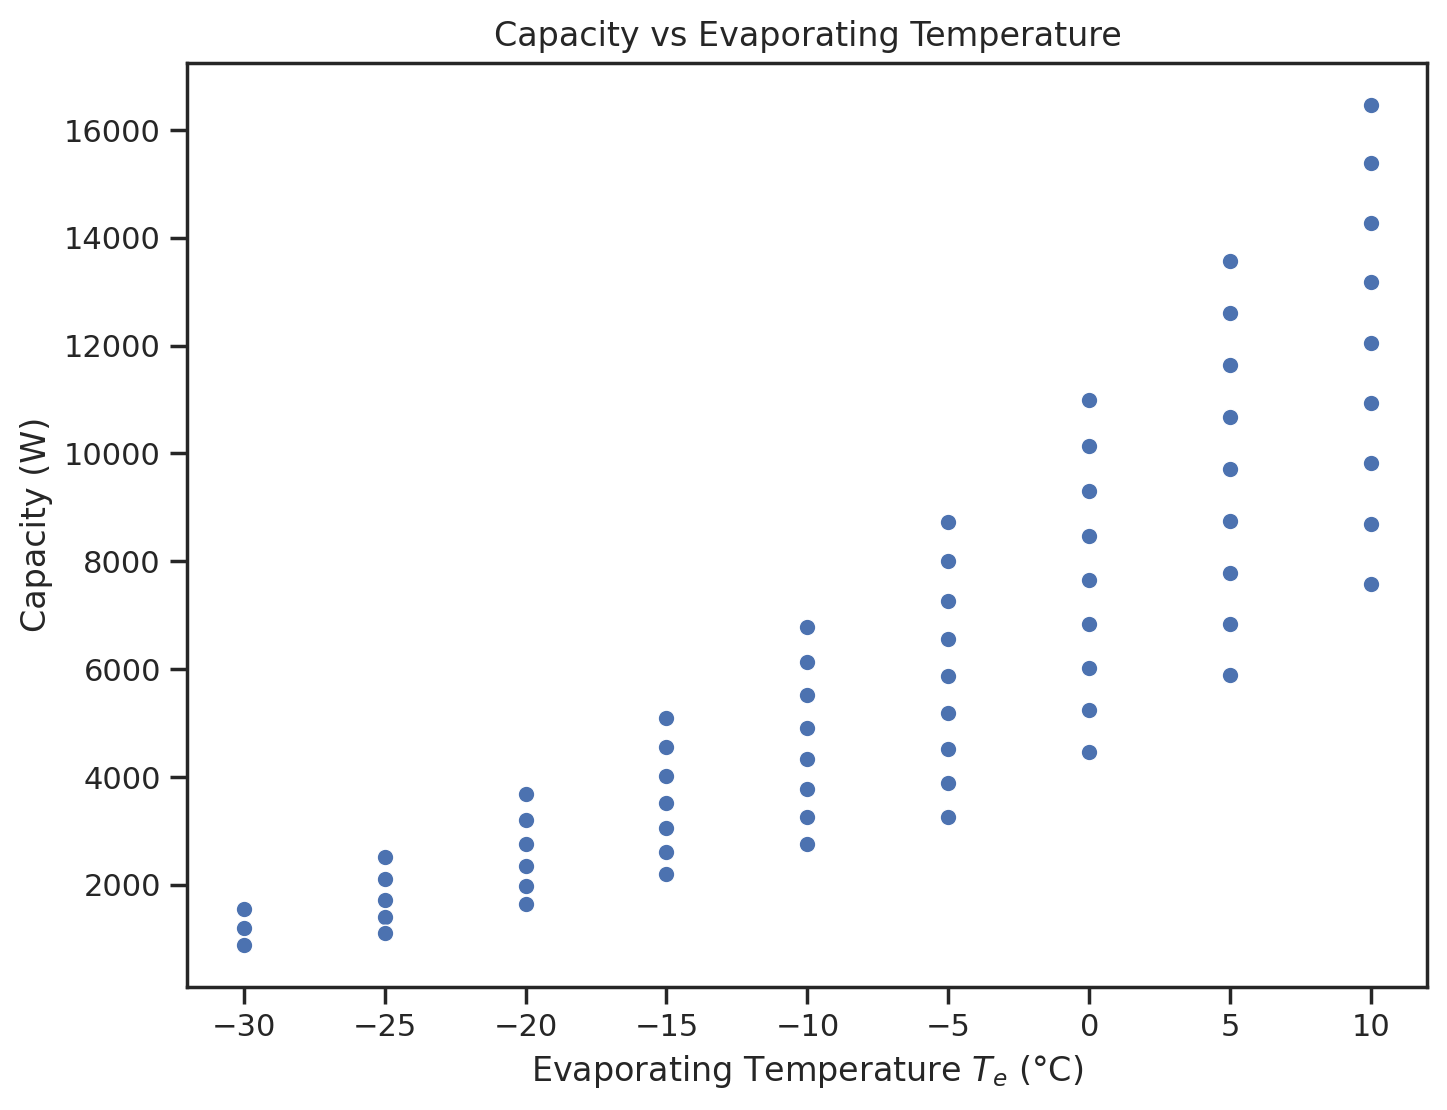

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='T_e', y='Capacity')
plt.xlabel('Evaporating Temperature $T_e$ (°C)')
plt.ylabel('Capacity (W)')
plt.title('Capacity vs Evaporating Temperature')
plt.show()

+ Do the scatter plot between `T_c` and `Capacity`.

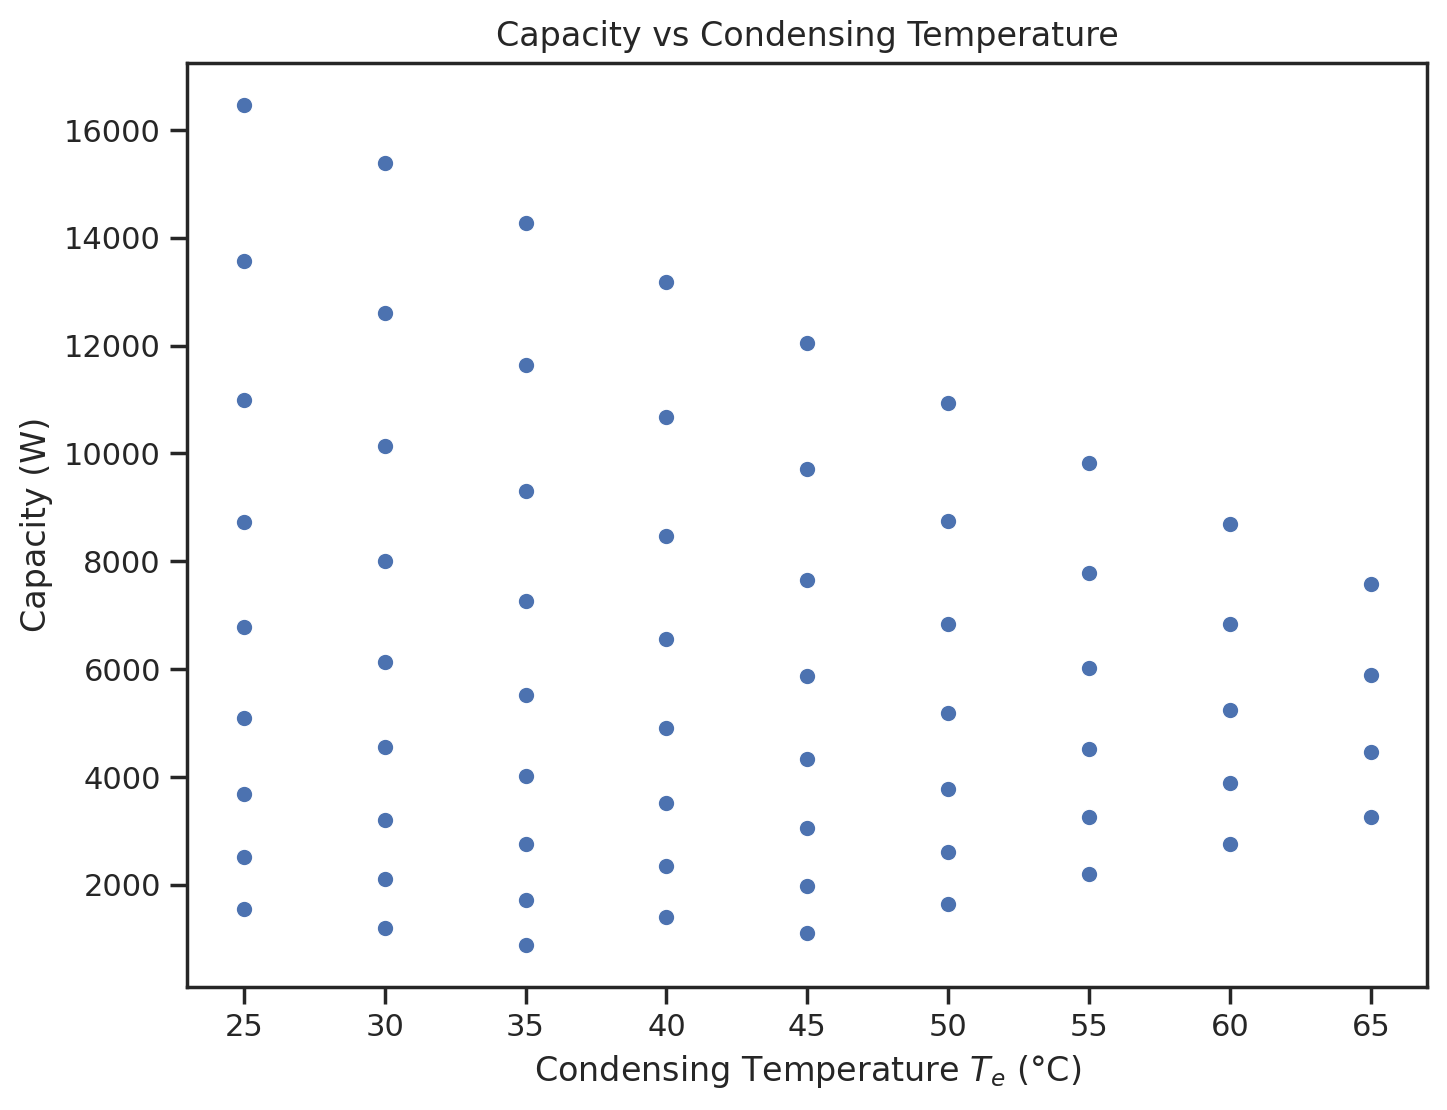

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='T_c', y='Capacity')
plt.xlabel('Condensing Temperature $T_e$ (°C)')
plt.ylabel('Capacity (W)')
plt.title('Capacity vs Condensing Temperature')
plt.show()

+ Do the scatter plot between `T_e` and `Power`.

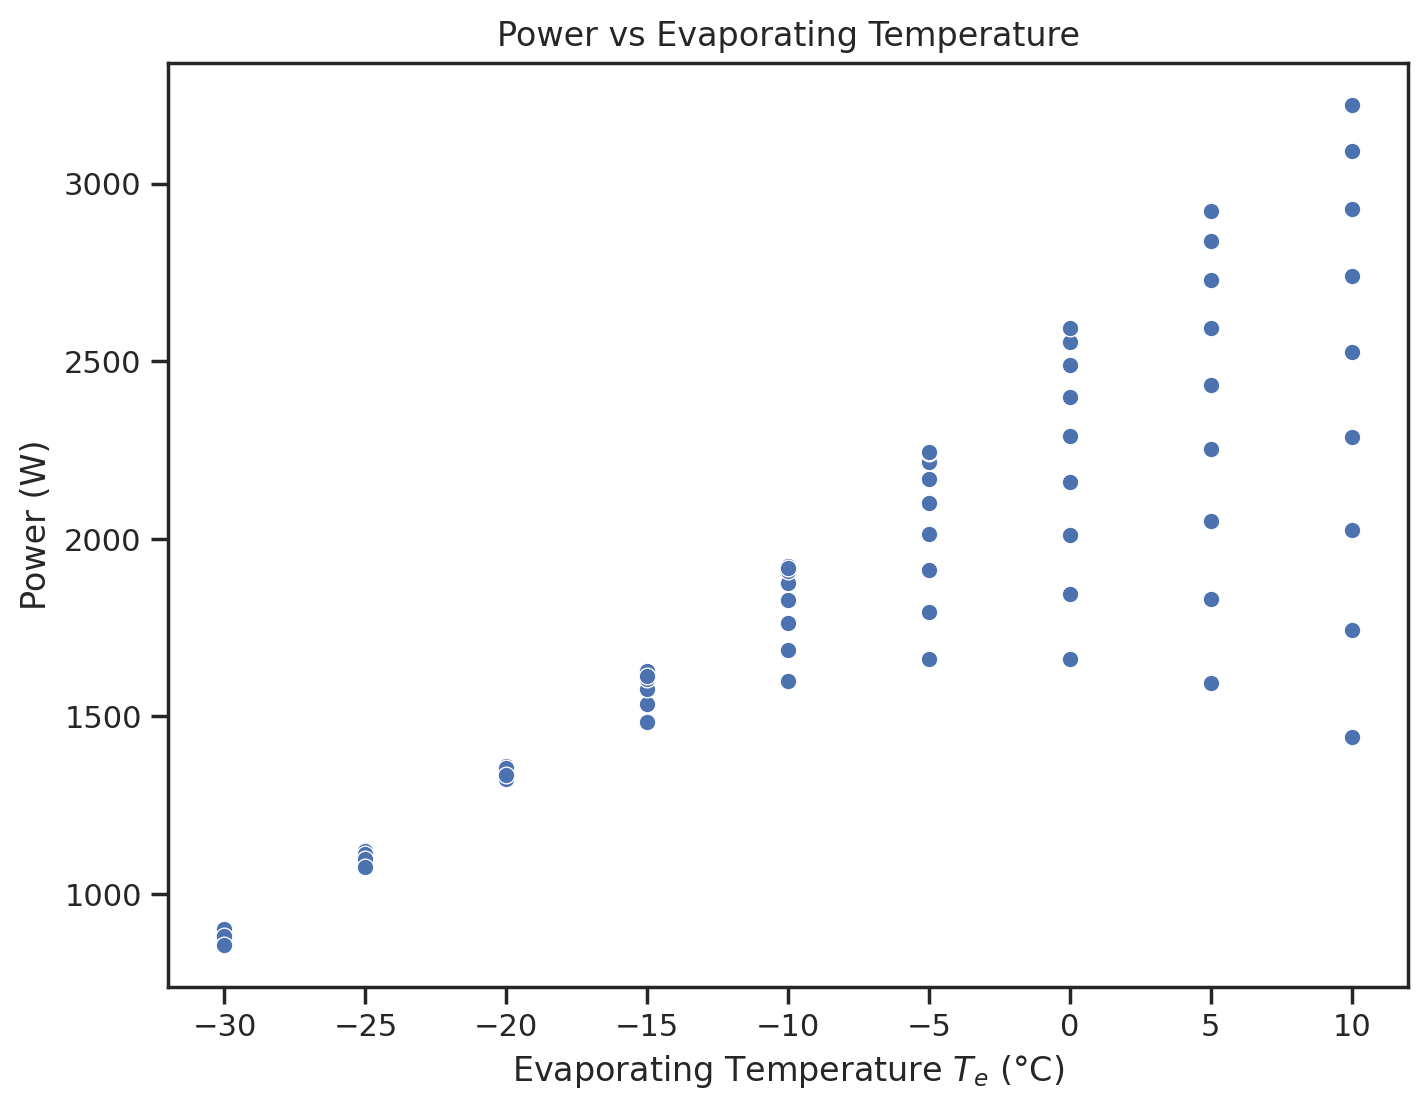

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='T_e', y='Power')
plt.xlabel('Evaporating Temperature $T_e$ (°C)')
plt.ylabel('Power (W)')
plt.title('Power vs Evaporating Temperature')
plt.show()

+ Do the scatter plot between `T_c` and `Power`.

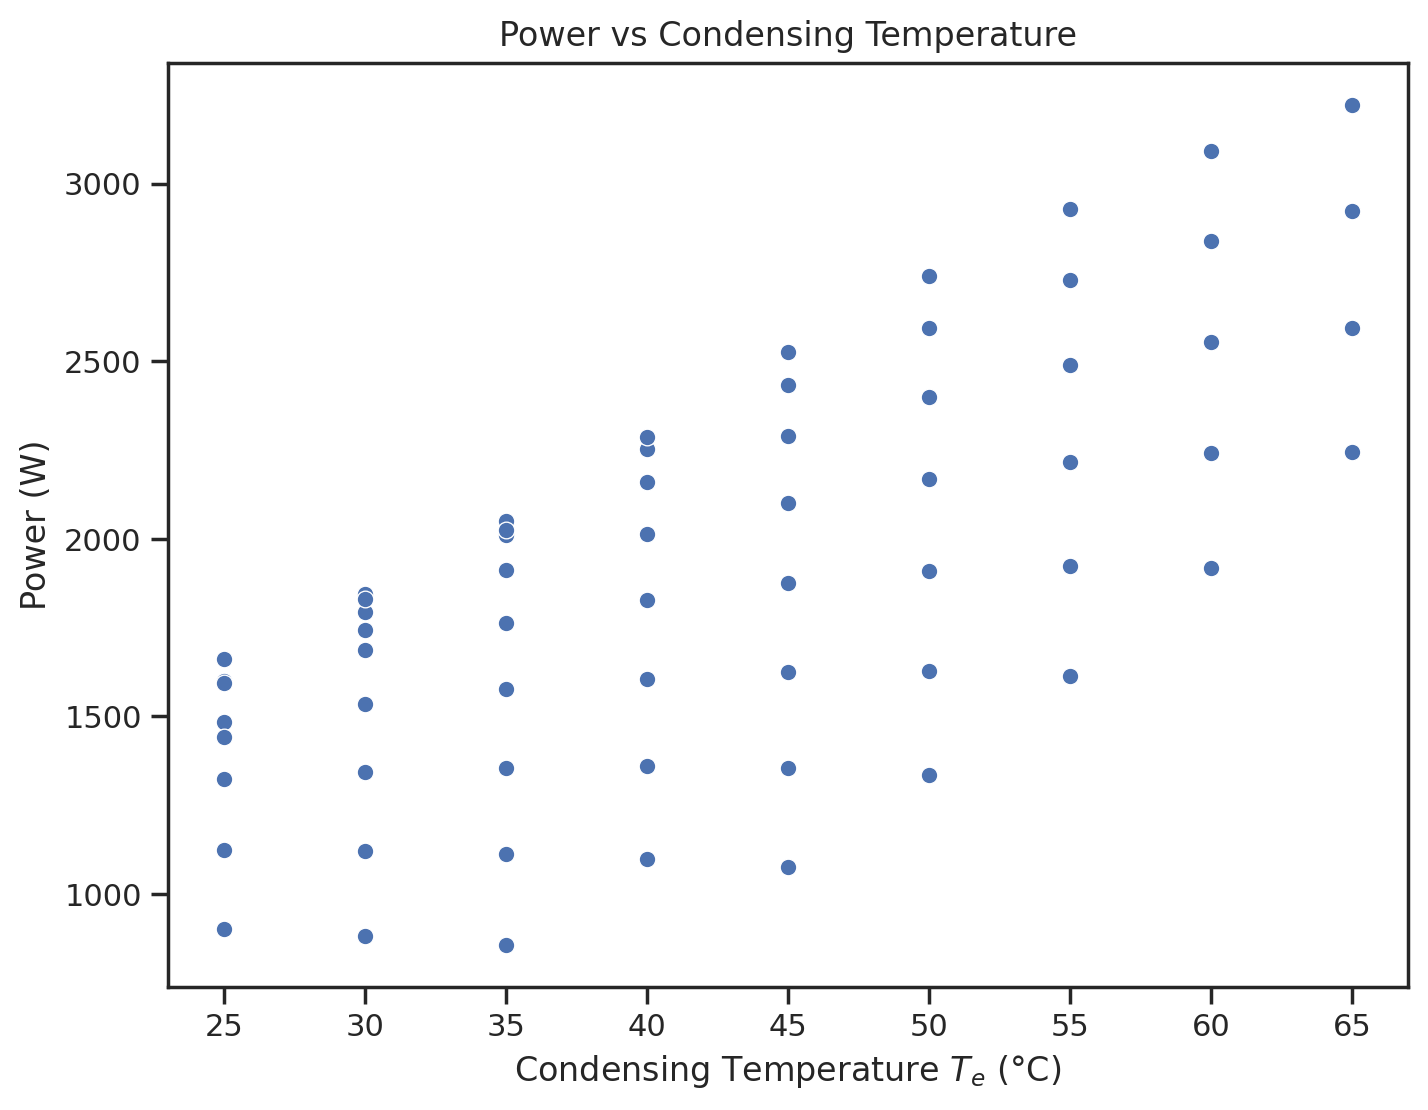

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='T_c', y='Power')
plt.xlabel('Condensing Temperature $T_e$ (°C)')
plt.ylabel('Power (W)')
plt.title('Power vs Condensing Temperature')
plt.show()

+ We are lucky that we only have two experimental control variables because can do a bit more thing with scatter. You can color each point in the scatter plot according to a scale that follows an output variable. Let me show you what I mean by doing the plot for the `Capacity`.

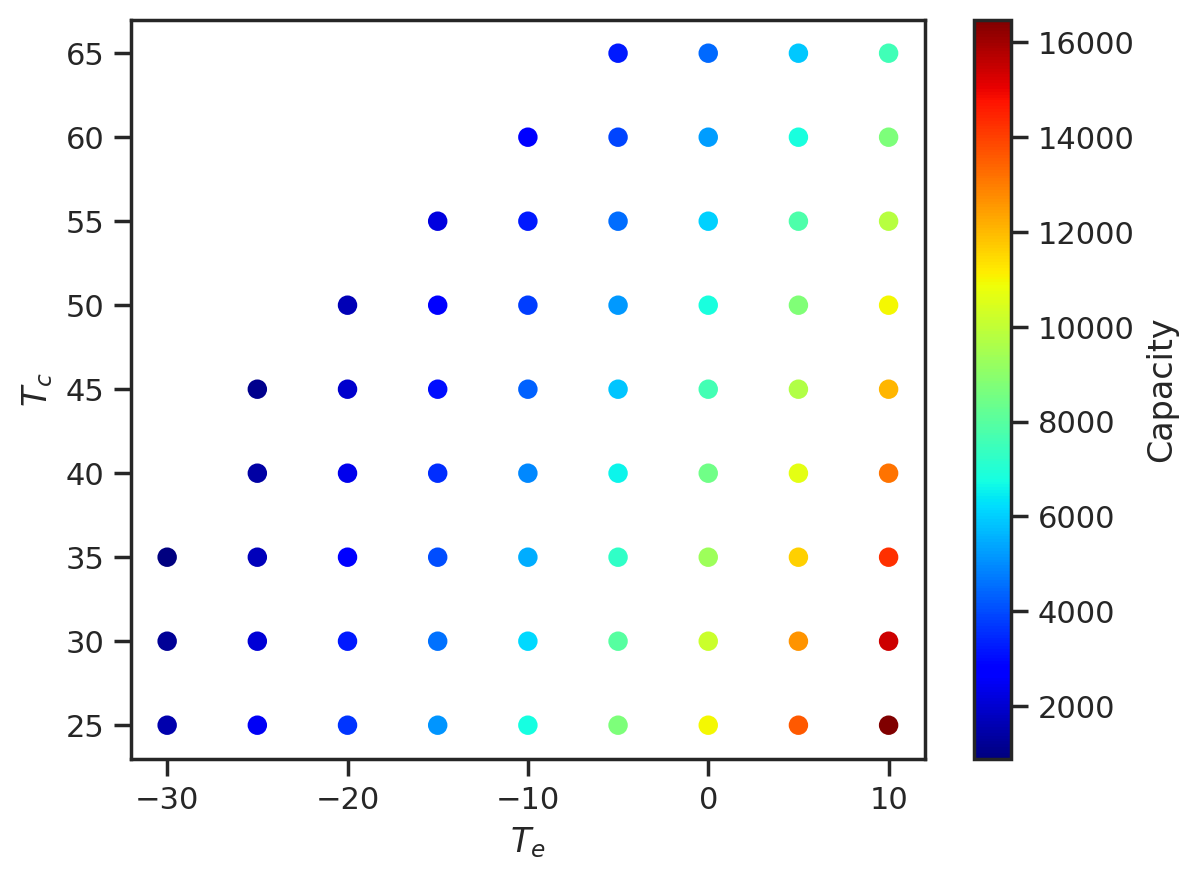

In [9]:
from matplotlib import cm
fig, ax = plt.subplots()
cs = ax.scatter(data['T_e'], data['T_c'], # So far a standard scatter plot
                c=data['Capacity'], # This is telling matplotlib what the color
                                 # of the points should be
                cmap=cm.jet      # This is saying to use the jet colormap
                                 # (blue = smallest values, red = highest values)
               )
plt.colorbar(cs, label='Capacity')   # This gives us a colorbar
ax.set_xlabel('$T_e$')
ax.set_ylabel('$T_c$');

Now repeat the same thing for the `Power`:

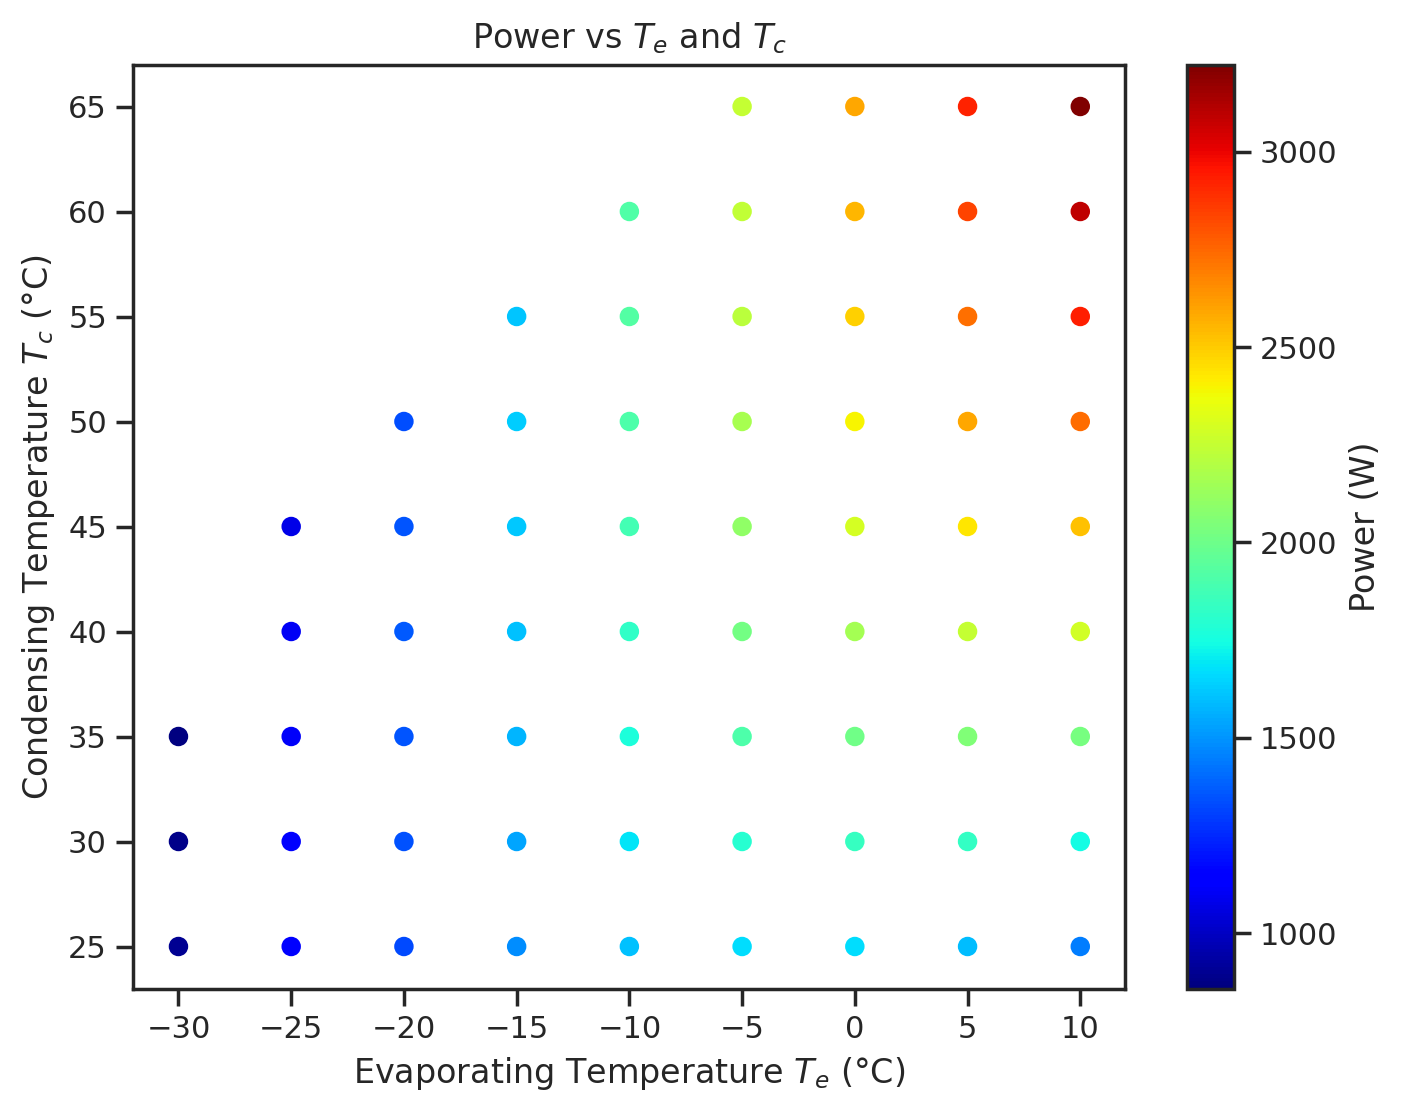

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(data['T_e'], data['T_c'],
            c=data['Power'],
            cmap='jet')
plt.colorbar(label='Power (W)')
plt.xlabel('Evaporating Temperature $T_e$ (°C)')
plt.ylabel('Condensing Temperature $T_c$ (°C)')
plt.title('Power vs $T_e$ and $T_c$')
plt.show()

## Problem 2 - Visual analysis of an airfoil experiment

In this problem, you are going to repeat what you did in Problem 1, but without my guidance!

The dataset we are going to use is the [Airfoil Self-Noise Data Set](https://archive.ics.uci.edu/dataset/291/airfoil+self+noise)
From this reference, the descreption of the dataset is as follows:

> The NASA data set comprises different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack. The span of the airfoil and the observer position were the same in all of the experiments.
>
> Attribute Information:
> This problem has the following inputs:
> 1. Frequency, in Hertzs.
> 2. Angle of attack, in degrees.
> 3. Chord length, in meters.
> 4. Free-stream velocity, in meters per second.
> 5. Suction side displacement thickness, in meters.

> The only output is:
> 6. Scaled sound pressure level, in decibels.

Before we start, let's download and load the data.
I am going to put them in a dataframe for you.

In [11]:
!curl -O 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'
import numpy as np
import pandas as pd
raw_data = np.loadtxt('airfoil_self_noise.dat')
df = pd.DataFrame(raw_data,
                  columns=['Frequency', 'Angle_of_attack', 'Chord_length',
                            'Velocity', 'Suction_thickness', 'Sound_pressure'])
df

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 59984    0 59984    0     0   253k      0 --:--:-- --:--:-- --:--:--  256k


Frequency  Angle_of_attack  Chord_length  Velocity  Suction_thickness  \
0         800.0              0.0        0.3048      71.3           0.002663   
1        1000.0              0.0        0.3048      71.3           0.002663   
2        1250.0              0.0        0.3048      71.3           0.002663   
3        1600.0              0.0        0.3048      71.3           0.002663   
4        2000.0              0.0        0.3048      71.3           0.002663   
...         ...              ...           ...       ...                ...   
1498     2500.0             15.6        0.1016      39.6           0.052849   
1499     3150.0             15.6        0.1016      39.6           0.052849   
1500     4000.0             15.6        0.1016      39.6           0.052849   
1501     5000.0             15.6        0.1016      39.6           0.052849   
1502     6300.0             15.6        0.1016      39.6           0.052849   

      Sound_pressure  
0            126.201  
1            125.201  
2            125.951  
3            127.591  
4            127.461  
...              ...  
1498         110.264  
1499         109.254  
1500         106.604  
1501         106.224  
1502         104.204  

[1503 rows x 6 columns]

+ Do the histograms of all variables. Use as many code segments you need below to plot the histogram of each variable in a different plot. Make sure you label the axes correctly.

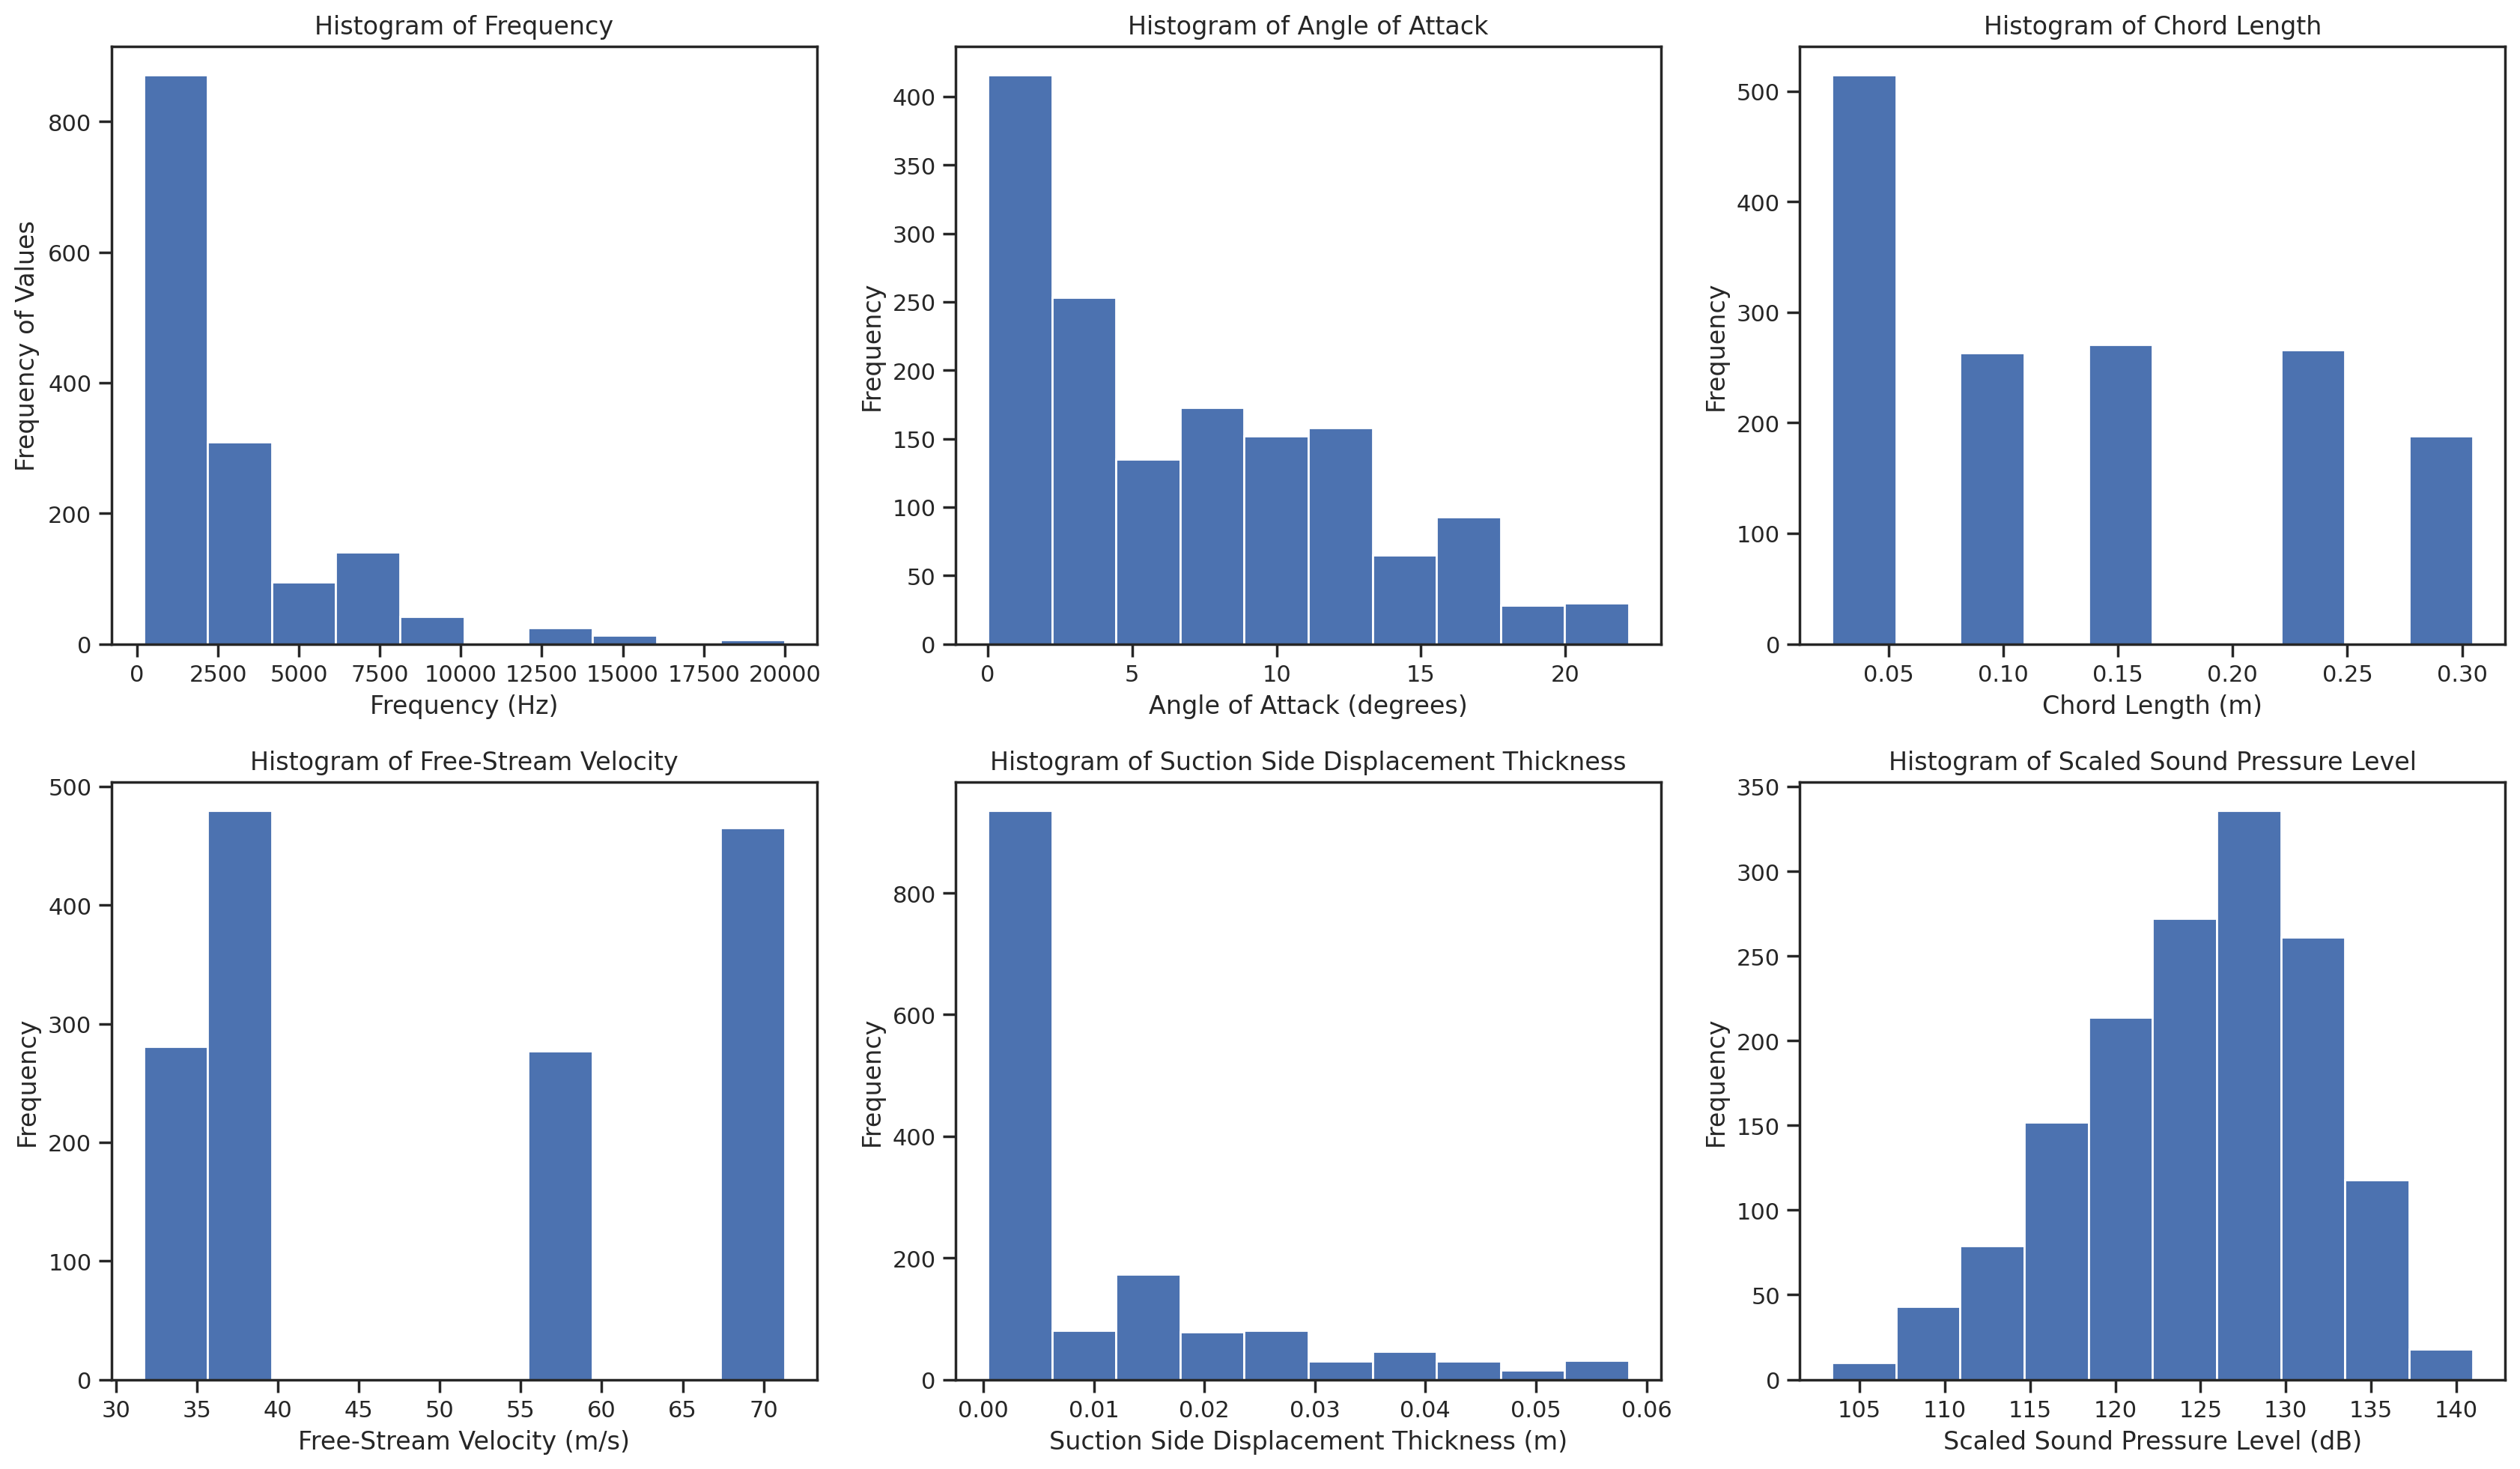

In [12]:
fig, ax = plt.subplots(2, 3, figsize=(17, 10))

ax[0, 0].hist(df['Frequency'])
ax[0, 0].set_title('Histogram of Frequency')
ax[0, 0].set_xlabel('Frequency (Hz)')
ax[0, 0].set_ylabel('Frequency of Values')

ax[0, 1].hist(df['Angle_of_attack'])
ax[0, 1].set_title('Histogram of Angle of Attack')
ax[0, 1].set_xlabel('Angle of Attack (degrees)')
ax[0, 1].set_ylabel('Frequency')

ax[0, 2].hist(df['Chord_length'])
ax[0, 2].set_title('Histogram of Chord Length')
ax[0, 2].set_xlabel('Chord Length (m)')
ax[0, 2].set_ylabel('Frequency')

ax[1, 0].hist(df['Velocity'])
ax[1, 0].set_title('Histogram of Free-Stream Velocity')
ax[1, 0].set_xlabel('Free-Stream Velocity (m/s)')
ax[1, 0].set_ylabel('Frequency')

ax[1, 1].hist(df['Suction_thickness'])
ax[1, 1].set_title('Histogram of Suction Side Displacement Thickness')
ax[1, 1].set_xlabel('Suction Side Displacement Thickness (m)')
ax[1, 1].set_ylabel('Frequency')

ax[1, 2].hist(df['Sound_pressure'])
ax[1, 2].set_title('Histogram of Scaled Sound Pressure Level')
ax[1, 2].set_xlabel('Scaled Sound Pressure Level (dB)')
ax[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

+ Do the scatter plot between all input variables. This will give you an idea of the range of experimental conditions. Are there any holes in the experimental dataset, i.e., places where you have no data?

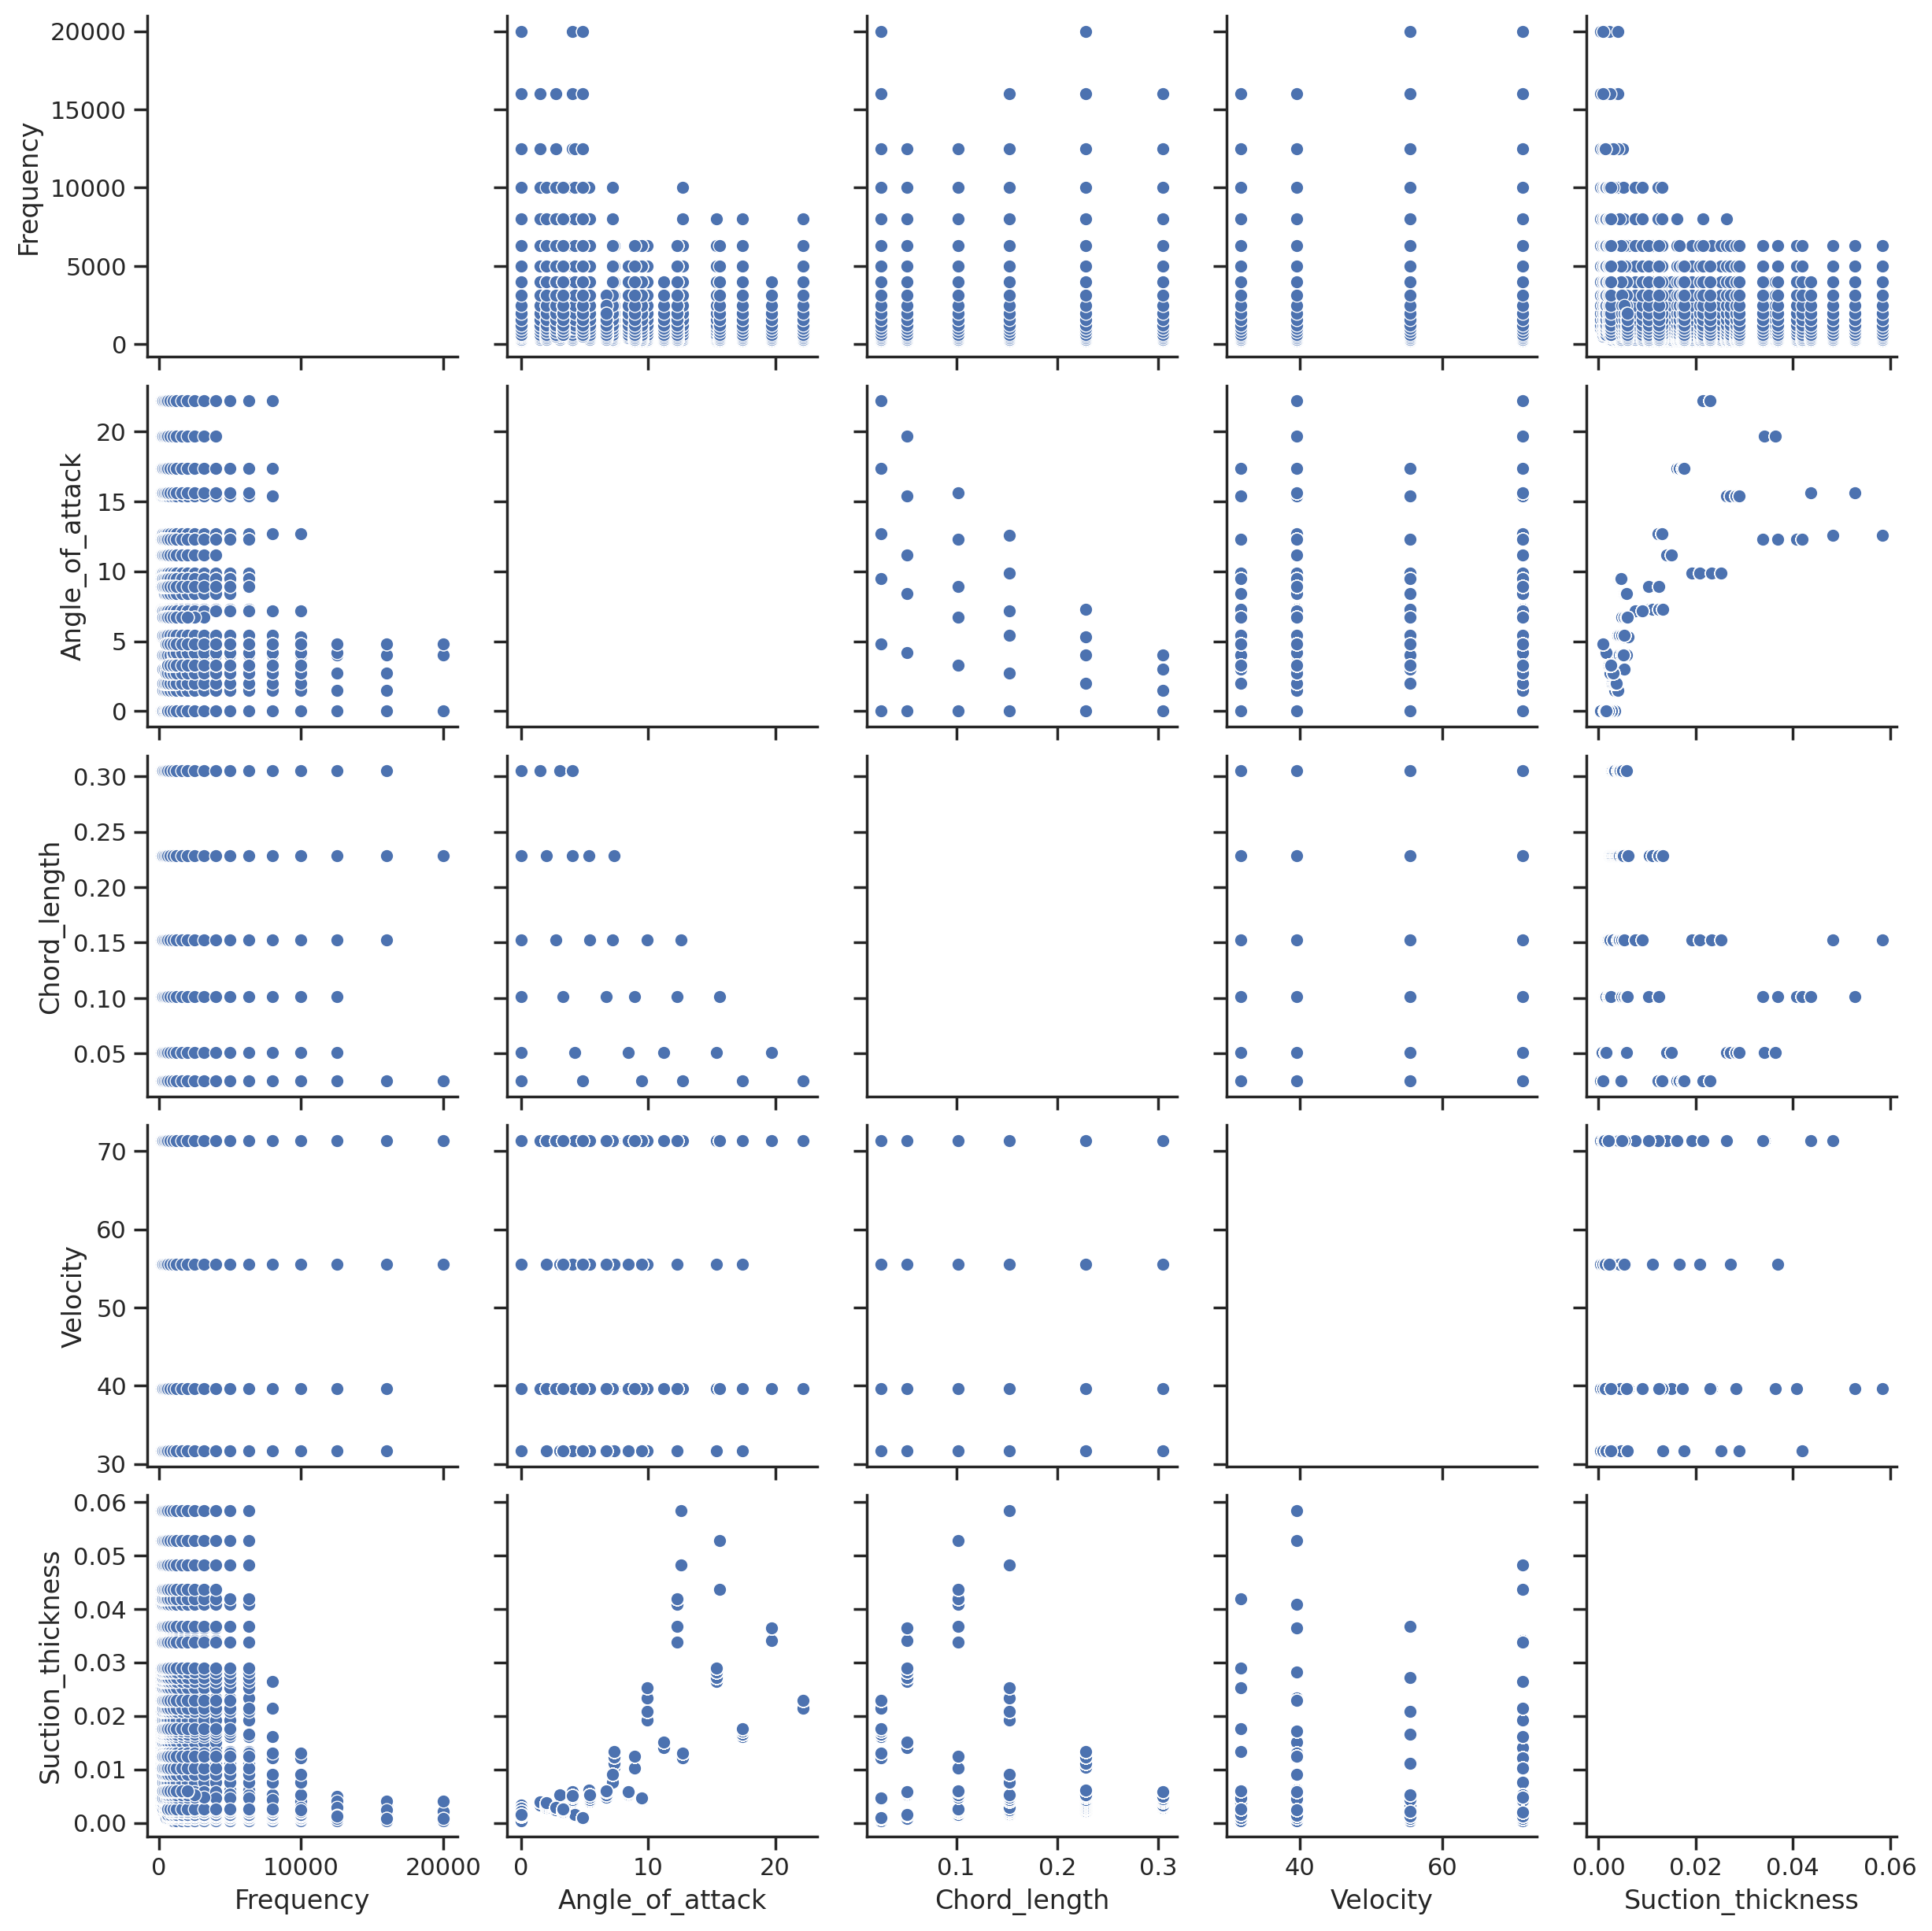

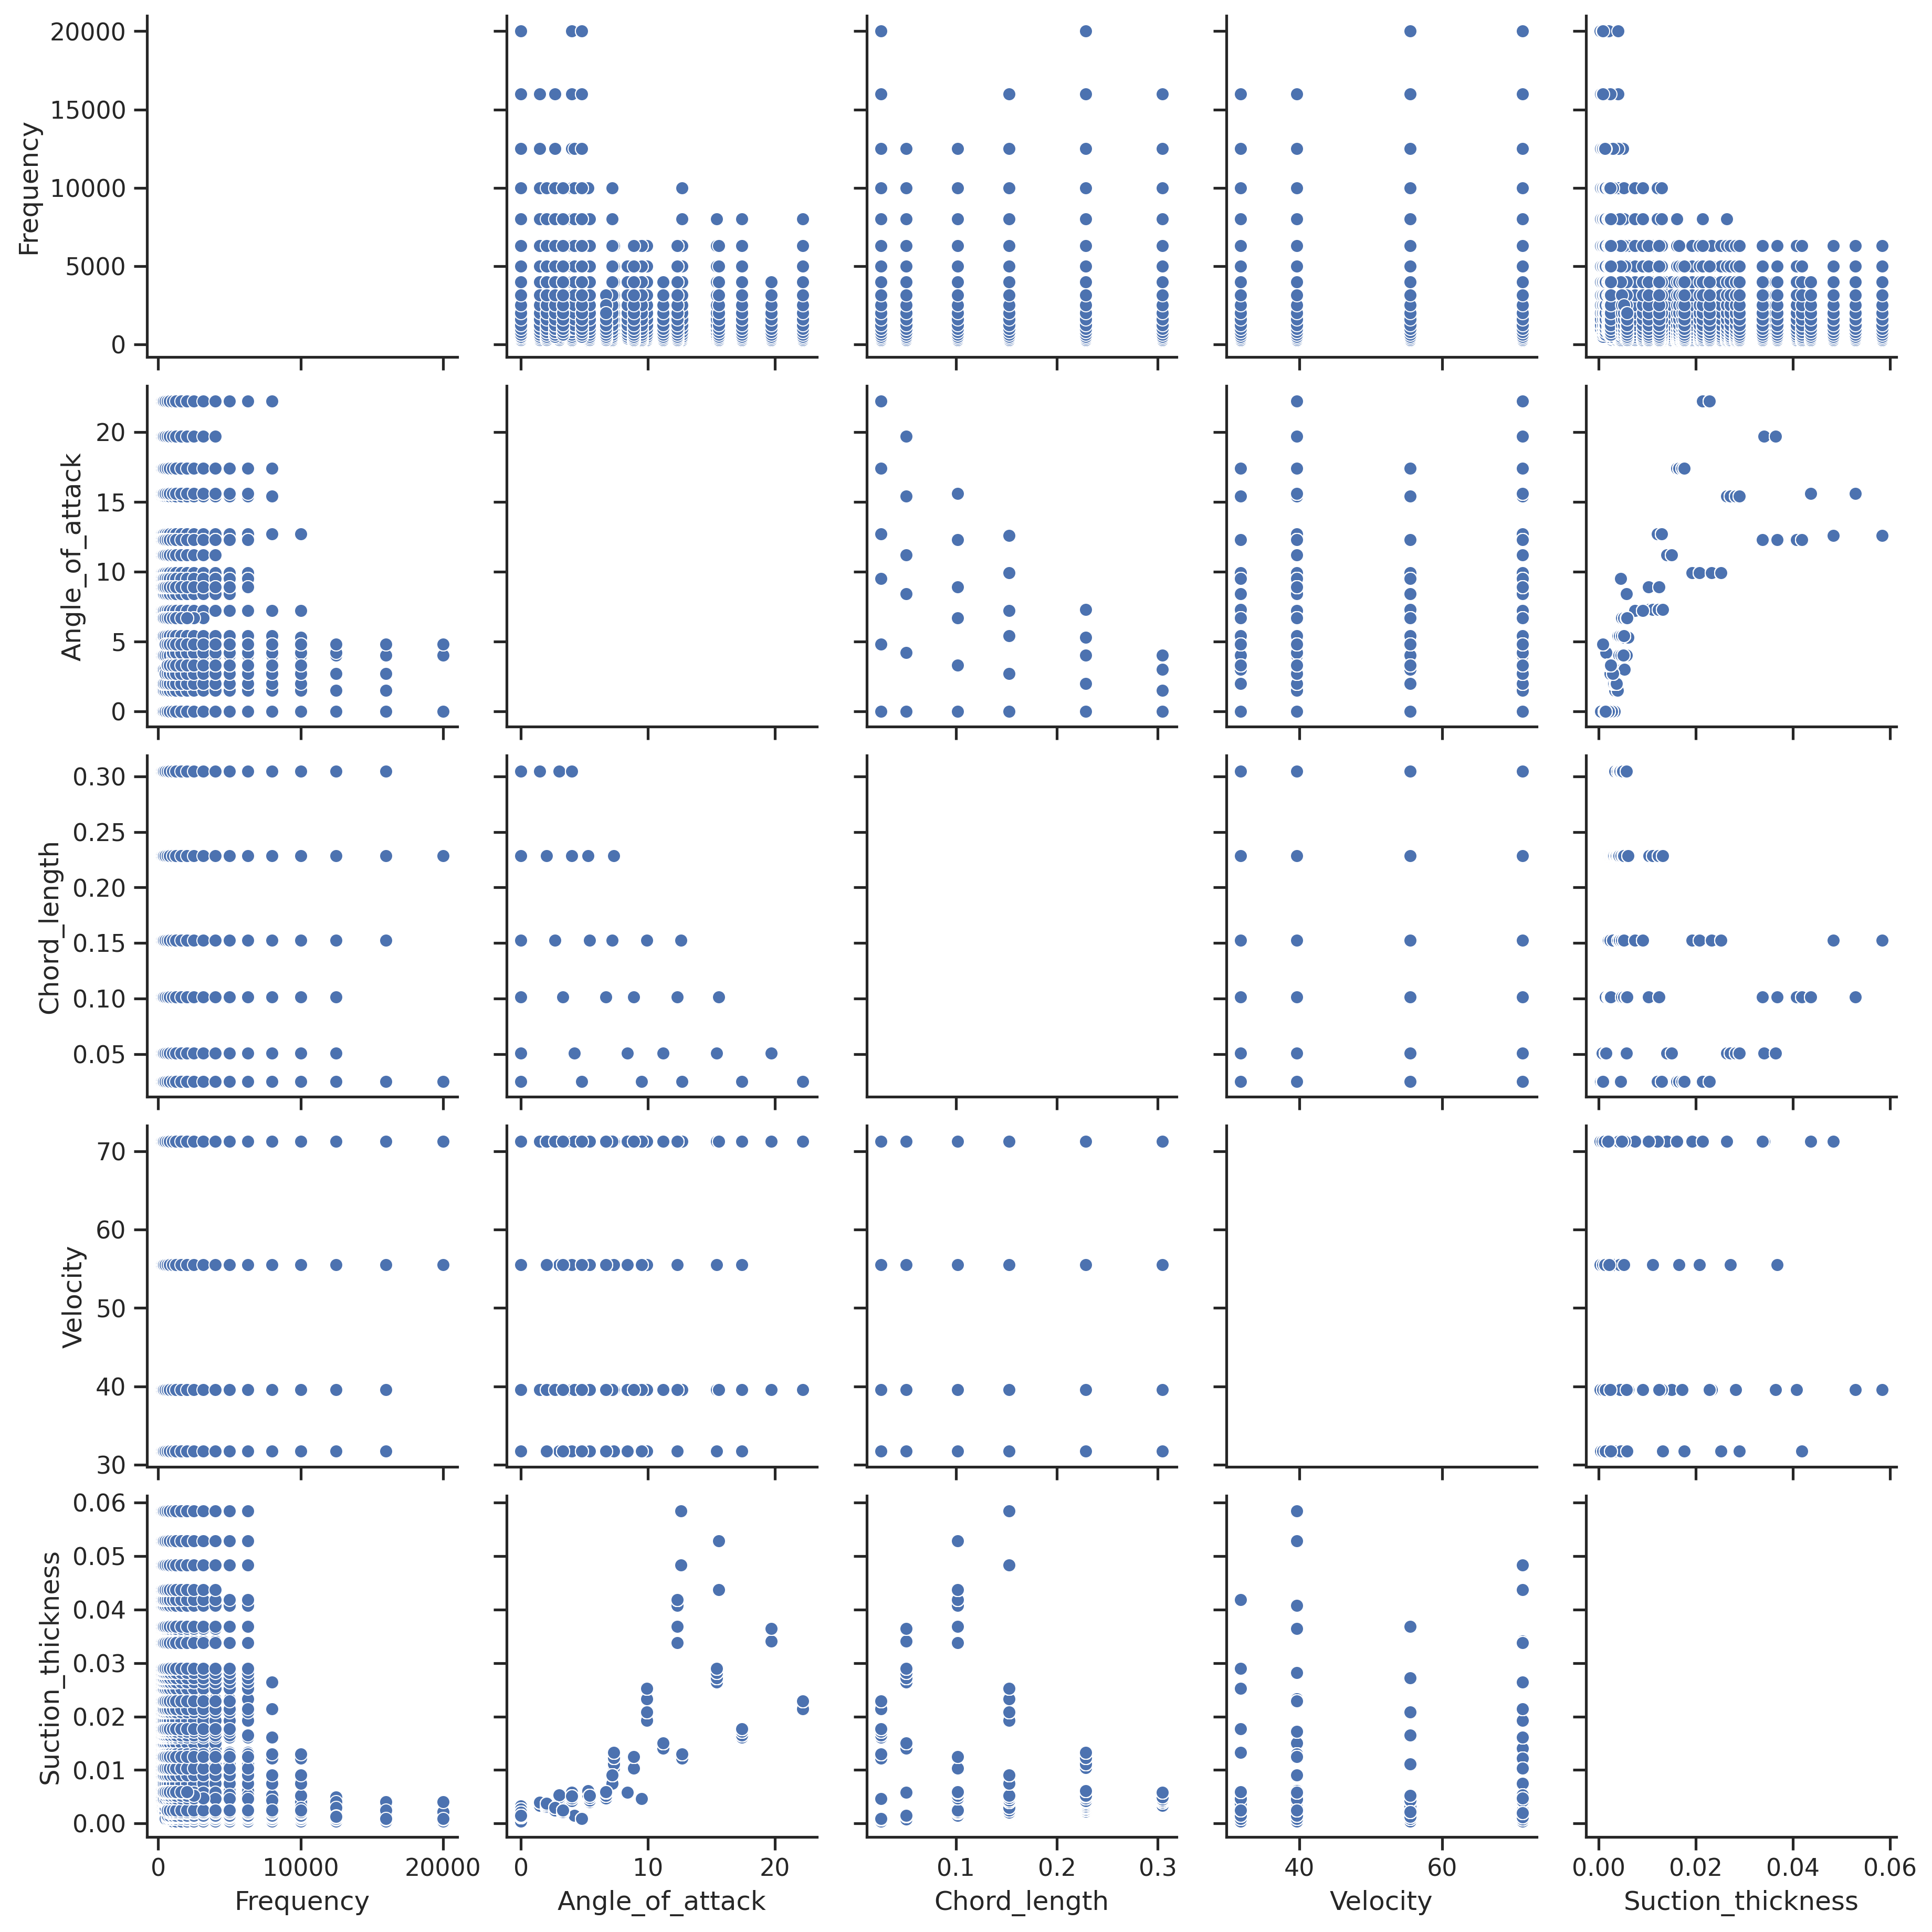

In [17]:
all_inputs = ['Frequency', 'Angle_of_attack', 'Chord_length', 'Velocity', 'Suction_thickness']

g = sns.pairplot(df, vars=['Frequency', 'Angle_of_attack', 'Chord_length', 'Velocity', 'Suction_thickness'], diag_kind='None');
g.savefig("pairplot.png", bbox_inches="tight")
plt.show()
from IPython.display import Image
Image("pairplot.png")

There are holes in majority of the plots involving velocity, angle of attack, and chord length. This is because they are discrete measurements rather than continuous measurements, which creates gaps.

+  Do the scatter plot between each input variable and the output. This will give you an idea of the relationship between each input and the output. Do you observe any obvious patterns?

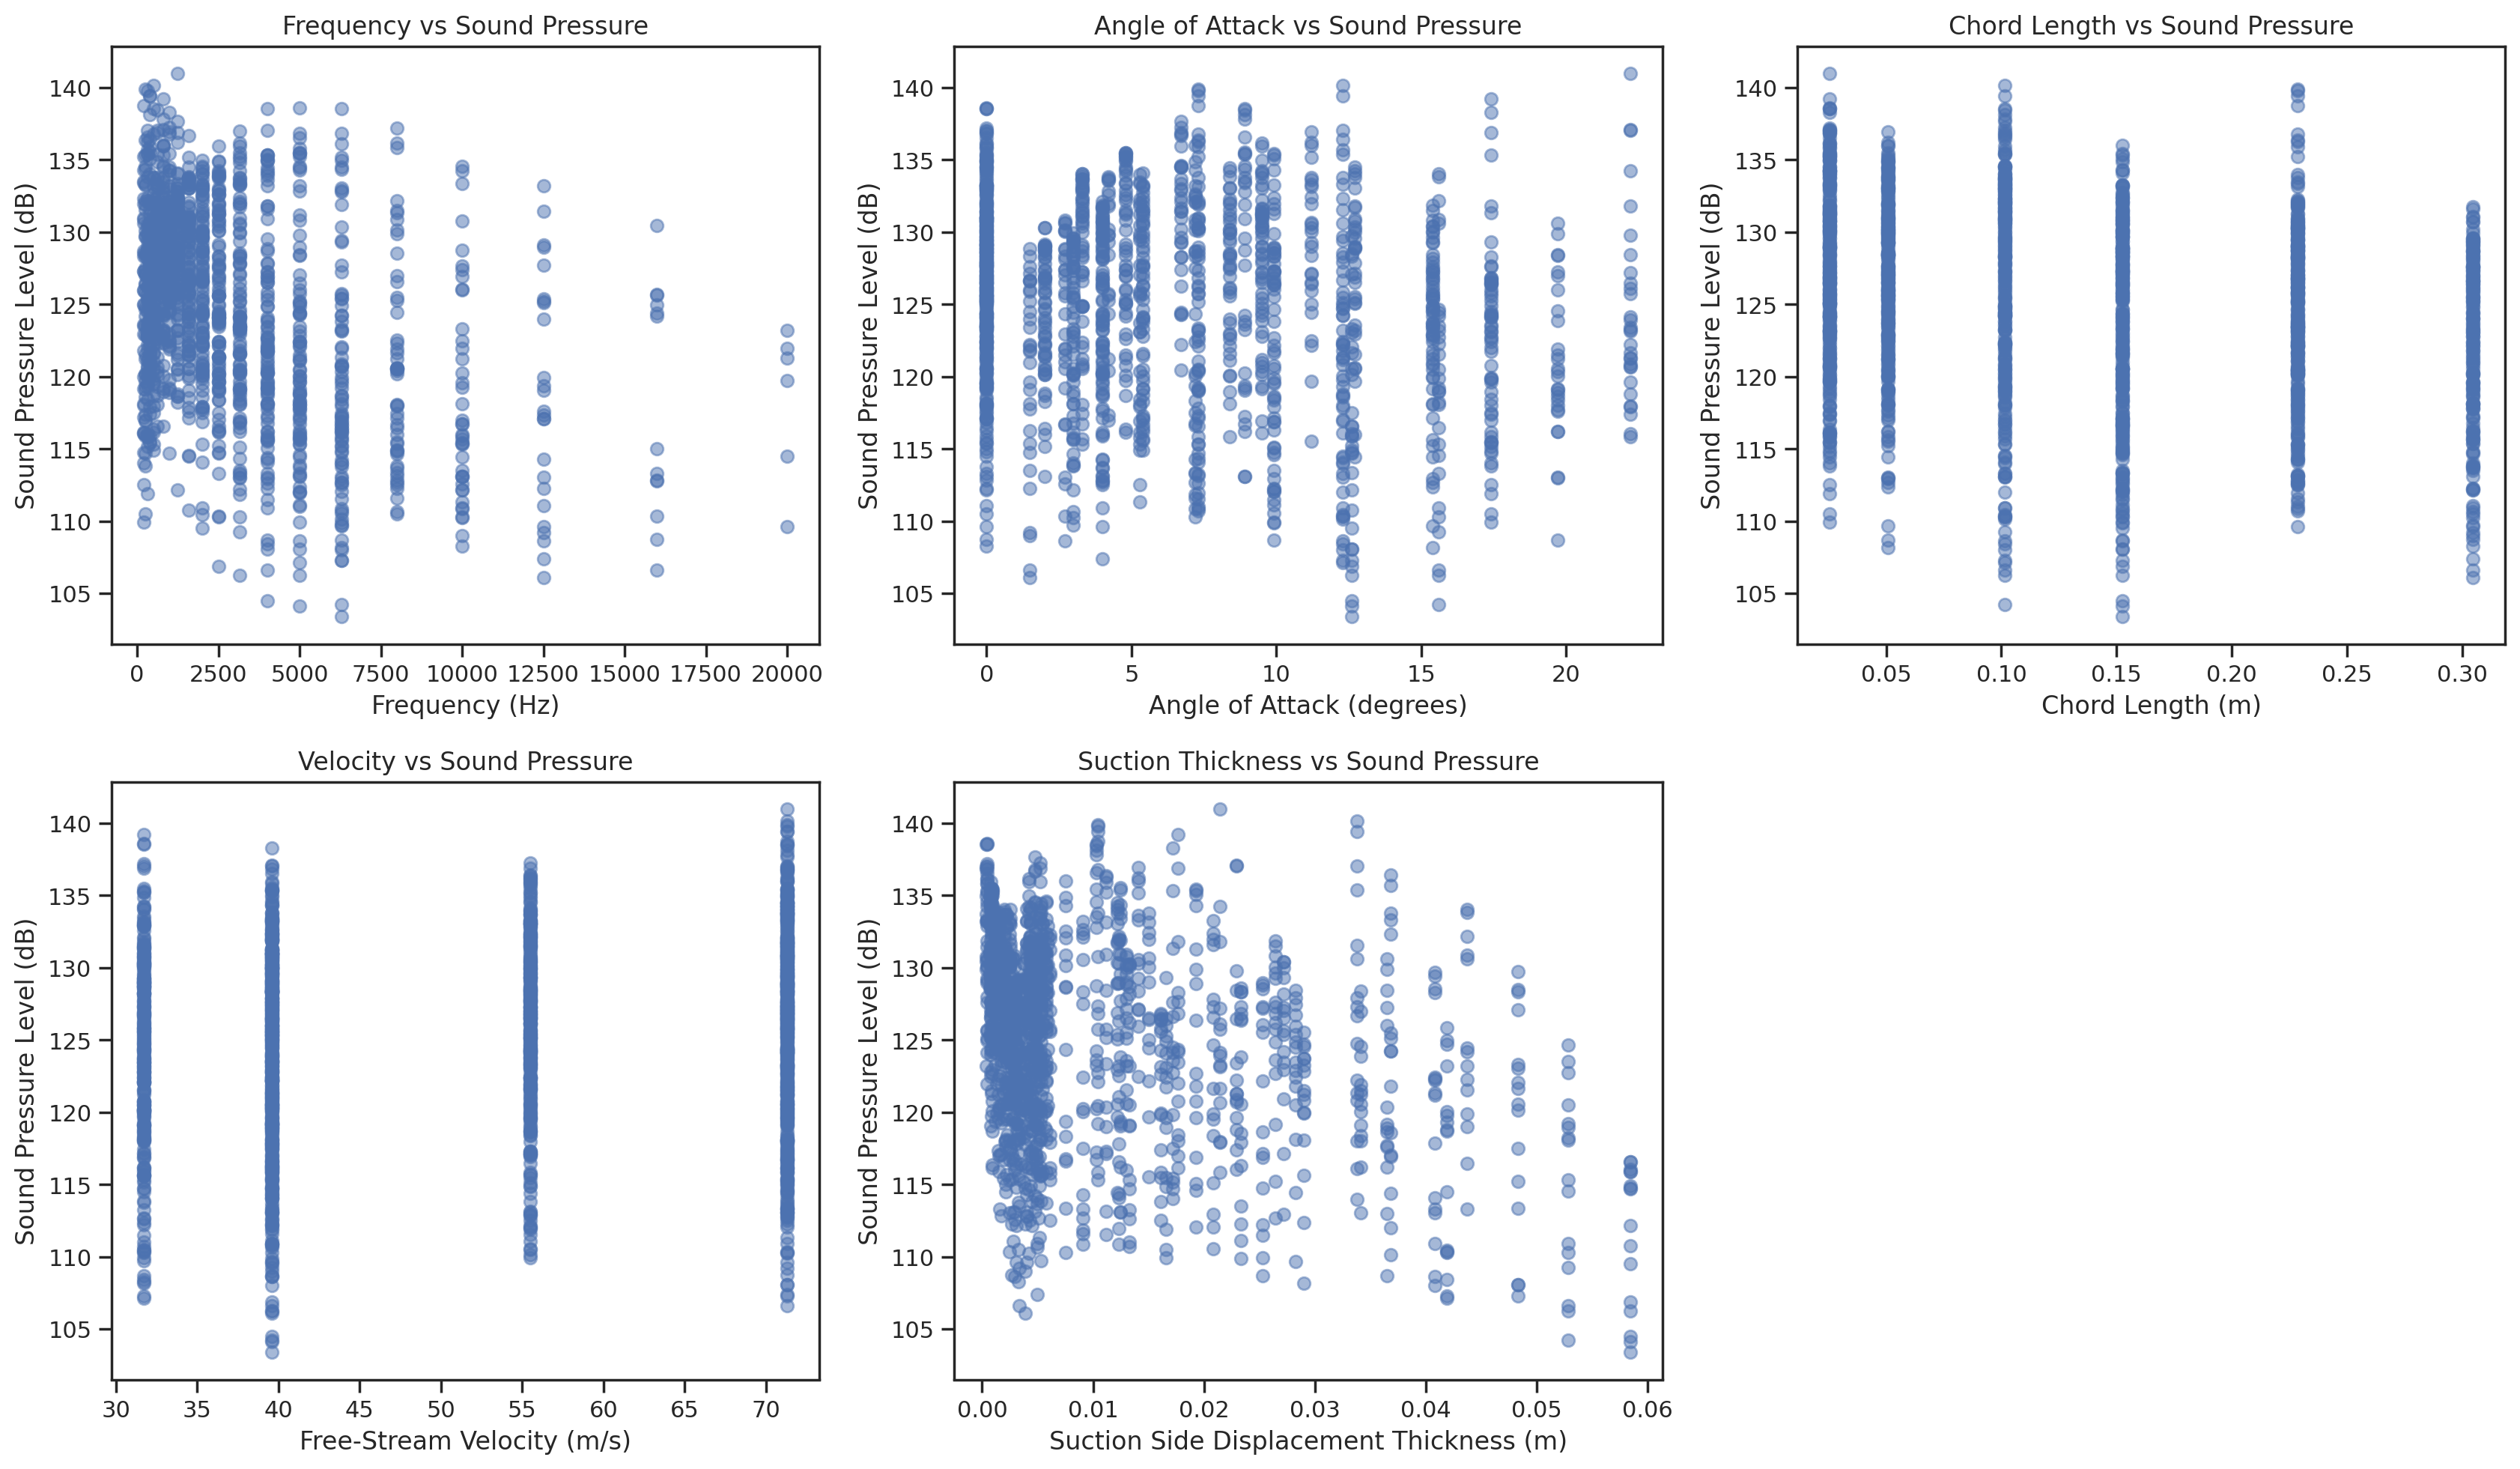

In [14]:
fig, ax = plt.subplots(2, 3, figsize=(17, 10))

ax[0, 0].scatter(df['Frequency'], df['Sound_pressure'], alpha=0.5)
ax[0, 0].set_title('Frequency vs Sound Pressure')
ax[0, 0].set_xlabel('Frequency (Hz)')
ax[0, 0].set_ylabel('Sound Pressure Level (dB)')

ax[0, 1].scatter(df['Angle_of_attack'], df['Sound_pressure'], alpha=0.5)
ax[0, 1].set_title('Angle of Attack vs Sound Pressure')
ax[0, 1].set_xlabel('Angle of Attack (degrees)')
ax[0, 1].set_ylabel('Sound Pressure Level (dB)')

ax[0, 2].scatter(df['Chord_length'], df['Sound_pressure'], alpha=0.5)
ax[0, 2].set_title('Chord Length vs Sound Pressure')
ax[0, 2].set_xlabel('Chord Length (m)')
ax[0, 2].set_ylabel('Sound Pressure Level (dB)')

ax[1, 0].scatter(df['Velocity'], df['Sound_pressure'], alpha=0.5)
ax[1, 0].set_title('Velocity vs Sound Pressure')
ax[1, 0].set_xlabel('Free-Stream Velocity (m/s)')
ax[1, 0].set_ylabel('Sound Pressure Level (dB)')

ax[1, 1].scatter(df['Suction_thickness'], df['Sound_pressure'], alpha=0.5)
ax[1, 1].set_title('Suction Thickness vs Sound Pressure')
ax[1, 1].set_xlabel('Suction Side Displacement Thickness (m)')
ax[1, 1].set_ylabel('Sound Pressure Level (dB)')

ax[1, 2].axis('off')

plt.tight_layout()
plt.show()

In the Sound Pressure Level vs Frequency plot, there appears to be a negative correlation, meaning that as frequency increases, the sound pressure level in decibles tends to decrease.

The relationship between the Angle of Attack and Sound Pressure Level does not have too strong of a correlation, appearing slightly negative but also weirdly shaped.

The plot for Chord Length and Sound Pressure Level also has a slight negative correlation, but not very strongly.

In the Sound Pressure Level vs Velocity plot, there is a slight positive correlation, which makes sense as an increase in velocity corresponds to more highly-energized airflow, allowing for greater volume.

There is a negative correlation between Sound Pressure Level and Suction Side Displacement Thickness, which means that with a greater displacement thickness, the sound pressure level decreases.

+ Now pick the two input variables you think are the most important and do the scatter plot between them using the output to color the points (see the last question of Problem 1). Feel free to repeat it with more than two pairs of inputs if you want. Briefly discuss your findings.

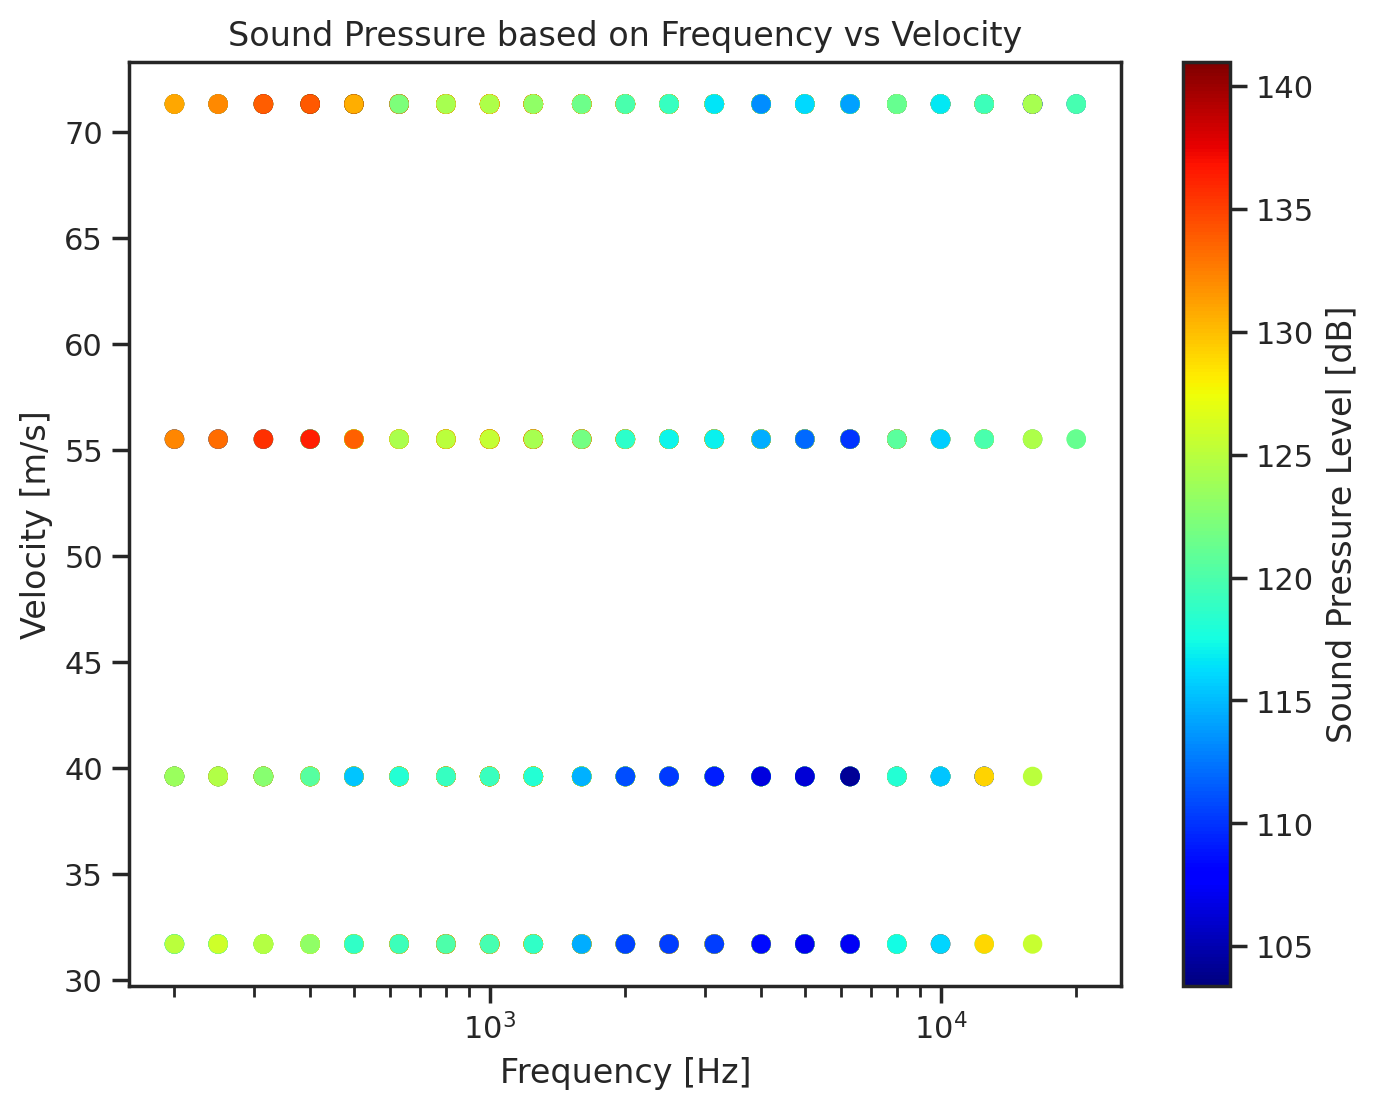

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Frequency'], df['Velocity'],
                c=df['Sound_pressure'],
                cmap='jet')
plt.colorbar(label='Sound Pressure Level [dB]')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Velocity [m/s]')
plt.xscale('log')
plt.title('Sound Pressure based on Frequency vs Velocity')
plt.show()

First, I implemented a logarithmic scale on the x-axis to better spread out the data because this is typically how frequency data behaves, such as the YouTube volume bar. Through this graph, we find that there is a region of high sound pressure at high velocity and low frequency. This can be explained by higher velocity correlating with more energized airflow, which allows for greater loudness. While low frequency can decrease volume, it creates more turbulent airflow as well, which actually increases the noise production.